In [1]:
%matplotlib inline

:::{admonition} Download
:class: important render-all

This notebook can be downloaded as **{nb-download}`01_fundamentals_of_pynapple.ipynb`**. See the button at the top right to download as markdown or pdf.
:::

:::{admonition} Jupyter Lab tip
:class: important render-all

Newer versions of Jupyter Lab have addressed an issue with skipping around the notebook while scrolling. To make sure this fix is enabled, in the Jupyter Lab GUI, navigate to `Settings > Settings Editor > Notebook` and scroll down to the `Windowing mode` setting and make sure it is set to `contentVisibility`. 

Also reminder to presenter: Go to `View > Appearance`, select `Simple Interface` and turn off everything else to hide as many bars as possible. And maybe activate `Presentation Mode`.

And turn on `View > Render side-by-side` (shortcut `Shift+R`).
:::


<div class="render-all">

# Learning the fundamentals of pynapple

## Learning objectives


- Instantiate pynapple objects
- Make pynapple objects interact
- Use numpy with pynapple
- Slice pynapple objects
- Add metadata to pynapple objects
- Apply core functions of pynapple

**Resources:**
- [Pynapple documentation](https://pynapple.org)
- [API reference for objects and methods](https://pynapple.org/api.html)


Let's start by importing the pynapple package and matplotlib to see if everything is correctly installed.
If an import fails, you can do `!pip install pynapple matplotlib` in a cell to fix it.

</div>

In [2]:
import workshop_utils
import pynapple as nap
import matplotlib.pyplot as plt
import numpy as np

/home/agent/workspace/rorse_ccn-software-feb-2026_main/.venv/lib/python3.12/site-packages/nemos/_documentation_utils/plotting.py:39: UserWarning: plotting functions contained within `_documentation_utils` are intended for nemos's documentation. Feel free to use them, but they will probably not work as intended with other datasets / in other contexts.
  warnings.warn(


For this notebook we will work with fake data. The following cells generate a set of variables that we will use to create the different pynapple objects.

In [3]:
var1 = np.random.randn(100) # Variable 1
tsp1 = np.arange(100) # The timesteps of variable 1

var2 = np.random.randn(100, 3) # Variable 2
tsp2 = np.arange(0, 100, 1) # The timesteps of variable 2
col2 = ['pineapple', 'banana', 'tomato'] # The name of each columns of var2

var3 = np.random.randn(1000, 4, 5) # Variable 3
tsp3 = np.arange(0, 100, 0.1) # The timesteps of variable 3

random_times_1 = np.array([3.14, 37.0, 42.0])
random_times_2 = np.array([10, 25, 50, 70])
random_times_3 = np.sort(np.random.uniform(10, 80, 100))

starts_1 = np.array([10000, 60000, 90000]) # starts of an epoch in `ms`
ends_1 = np.array([20000, 80000, 95000]) # ends in `ms`

## Instantiate pynapple objects 

This is a lot of variables to carry around. pynapple can help reduce the size of the workspace. Here we will instantiate all the different pynapple objects with the variables created above.

Let's start with the simple ones.

<div class="render-all">

**Question:** Can you instantiate the right pynapple objects for `var1`, `var2` and `var3`? Objects should be named respectively `tsd1`, `tsd2` and `tsd3`. Don't forget the column name for `var2`.

</div>

In [4]:
tsd1 = nap.Tsd(t=tsp1, d=var1)
tsd2 = nap.TsdFrame(t=tsp2, d=var2, columns = col2)
tsd3 = nap.TsdTensor(t=tsp3, d=var3)

<div class="render-all">

**Question:** Can you print `tsd1`?

</div>

In [5]:
print(tsd1)

Time (s)
----------  ---------
0.0         -2.20512
1.0          0.718634
2.0          0.161622
3.0          1.56441
4.0         -0.759594
5.0          2.47733
6.0         -1.07887
...
93.0        -0.22812
94.0        -0.283088
95.0        -0.795697
96.0        -1.16826
97.0        -0.937133
98.0        -0.829
99.0         0.409122
dtype: float64, shape: (100,)


<div class="render-all">

**Question:** Can you print `tsd2`?

</div>

In [6]:
print(tsd2)

Time (s)      pineapple      banana     tomato
----------  -----------  ----------  ---------
0.0            1.77754    0.0552179  -0.699664
1.0            1.40508    1.97694     0.883891
2.0           -1.16592    1.08917    -0.113789
3.0           -0.420751   0.799943   -1.3396
4.0           -0.707111   0.745992    0.738313
5.0            0.880897   0.950019    0.10908
6.0            1.94933    0.245444    0.365745
...
93.0           1.08462    0.785057   -0.107885
94.0           0.109325   0.419573    0.132872
95.0          -1.10657    1.16389    -1.37155
96.0          -0.984443  -0.361856    0.806513
97.0           0.112717   0.169257   -0.416383
98.0          -1.4042    -0.014491    0.2091
99.0           0.264982  -0.119991    1.25284
dtype: float64, shape: (100, 3)


<div class="render-all">

**Question:** Can you print `tsd3`?

</div>

In [7]:
print(tsd3)

Time (s)
----------  -------------------------------
0.0         [[-0.149712 ...  0.718845] ...]
0.1         [[-0.583185 ...  0.61722 ] ...]
0.2         [[-0.847943 ... -0.508067] ...]
0.3         [[0.015796 ... 0.87438 ] ...]
0.4         [[1.530158 ... 0.632908] ...]
0.5         [[-0.659661 ... -0.516036] ...]
0.6         [[-0.361976 ...  0.490171] ...]
...
99.3        [[ 0.975142 ... -0.459714] ...]
99.4        [[-0.790548 ... -0.882506] ...]
99.5        [[1.293118 ... 2.927812] ...]
99.6        [[0.471043 ... 0.628258] ...]
99.7        [[-1.429289 ...  1.975578] ...]
99.8        [[-0.085316 ... -1.505249] ...]
99.9        [[ 2.161686 ... -2.392138] ...]
dtype: float64, shape: (1000, 4, 5)


<div class="render-all">

**Question:** Can you create an `IntervalSet` called `ep` out of `starts_1` and `ends_1` and print it? Be careful, times given above are in `ms`.

</div>

In [8]:
ep = nap.IntervalSet(
    start=starts_1, 
    end=ends_1, time_units='ms')
print(ep)

  index    start    end
      0       10     20
      1       60     80
      2       90     95
shape: (3, 2), time unit: sec.


<div class="render-all">

The experiment generated a set of timestamps from 3 different channels.

**Question:** Can you instantiate the corresponding pynapple object (`ts1`, `ts2`, `ts3`) for each one of them?

</div>

In [9]:
ts1 = nap.Ts(t=random_times_1)
ts2 = nap.Ts(t=random_times_2)
ts3 = nap.Ts(t=random_times_3)

<div class="render-all">

This is a lot of timestamps to carry around as well.

**Question:** Can you instantiate the right pynapple object (call it `tsgroup`) to group them together?

</div>

In [10]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3})

<div class="render-all">

**Question:** Can you print the result?

</div>

In [11]:
print(tsgroup)

  Index     rate
-------  -------
      0  0.03917
      1  0.05223
      2  1.30582


## Interaction between pynapple objects 

We reduced 12 variables in our workspace to 5 using pynapple. Now we can see how the objects interact.

<div class="render-all">

**Question:** Can you print the `time_support` of `tsgroup`?

</div>

In [12]:
print(tsgroup.time_support)

  index    start      end
      0     3.14  79.7205
shape: (1, 2), time unit: sec.


The experiment ran from 0 to 100 seconds and as you can see, the `TsGroup` object shows the rate. But the rate is not accurate as it was computed over the default `time_support`.

<div class="render-all">

**Question:** can you recreate the `tsgroup` object passing the right `time_support` during initialisation?

</div>

In [13]:
tsgroup = nap.TsGroup({0:ts1, 1:tsd2, 2:ts3}, time_support = nap.IntervalSet(0, 100))

<div class="render-all">

**Question:** Can you print the `time_support` and `rate` to see how they changed?

</div>

In [14]:
print(tsgroup.time_support)
print(tsgroup.rate)

  index    start    end
      0        0    100
shape: (1, 2), time unit: sec.
0    0.03
1    1.00
2    1.00
Name: rate, dtype: float64


<div class="render-all">

Now you notice that variable `tsd1` has some noise. The good signal is between 10 and 30 seconds and  50 and 100.

**Question:** Can you create an `IntervalSet` object called `ep_signal` and use it to restrict the variable `tsd1`?

</div>

In [15]:
ep_signal = nap.IntervalSet(start=[10, 50], end=[30, 100])

tsd1 = tsd1.restrict(ep_signal)

<div class="render-all">
You can print `tsd1` to check that the timestamps are in fact within `ep`.
You can also check the `time_support` of `tsd1` to see that it has been updated.
</div>

In [16]:
print(tsd1)
print(tsd1.time_support)

Time (s)
----------  ----------
10.0         0.0731114
11.0        -0.810561
12.0        -1.93984
13.0         0.759372
14.0         1.66163
15.0         0.202359
16.0         0.814246
...
93.0        -0.22812
94.0        -0.283088
95.0        -0.795697
96.0        -1.16826
97.0        -0.937133
98.0        -0.829
99.0         0.409122
dtype: float64, shape: (71,)
  index    start    end
      0       10     30
      1       50    100
shape: (2, 2), time unit: sec.


In [17]:
ep_tmp = nap.IntervalSet(np.sort(np.random.uniform(0, 100, 20)))
print(ep_tmp)

  index      start       end
      0   0.369044   1.26068
      1  10.8838    11.4514
      2  28.0975    34.8149
      3  46.2003    49.6701
      4  55.633     61.5494
      5  69.7716    74.7904
      6  75.9864    78.8901
      7  82.6285    82.8943
      8  87.6804    88.895
      9  92.5581    99.7086
shape: (10, 2), time unit: sec.


<div class="render-all">

**Question:** Can you do the intersection of `ep_signal` and `ep_tmp`?
</div>

In [18]:
print(ep_signal.intersect(ep_tmp))

  index    start      end
      0  10.8838  11.4514
      1  28.0975  30
      2  55.633   61.5494
      3  69.7716  74.7904
      4  75.9864  78.8901
      5  82.6285  82.8943
      6  87.6804  88.895
      7  92.5581  99.7086
shape: (8, 2), time unit: sec.


<div class="render-all">
You can visualize IntervalSet using the function `workshop_utils.visualize_intervals` we provide.
</div>

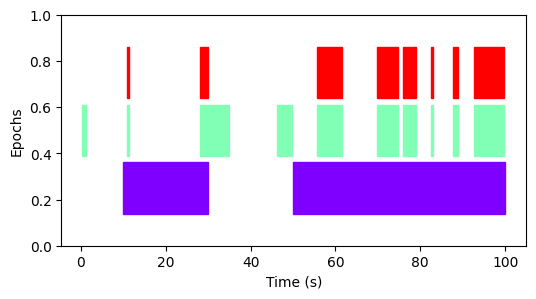

In [19]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.intersect(ep_tmp)])

<div class="render-all">

**Question:** Can you do the union of `ep_signal` and `ep_tmp`?
</div>

In [20]:
print(ep_signal.union(ep_tmp))

  index      start        end
      0   0.369044    1.26068
      1  10          34.8149
      2  46.2003     49.6701
      3  50         100
shape: (4, 2), time unit: sec.


<div class="render-all">

**Question:** Can you visualize it?
</div>

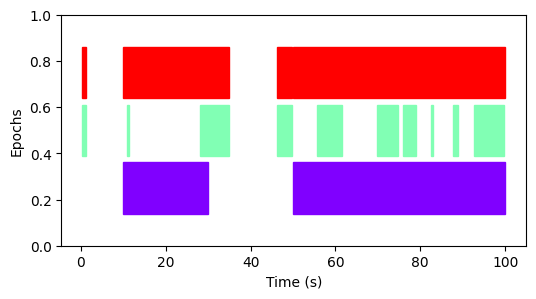

In [21]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.union(ep_tmp)])

<div class="render-all">

**Question:** Can you do the difference of `ep_signal` and `ep_tmp`?
</div>

In [22]:
print(ep_signal.set_diff(ep_tmp))

  index    start       end
      0  10        10.8838
      1  11.4514   28.0975
      2  50        55.633
      3  61.5494   69.7716
      4  74.7904   75.9864
      5  78.8901   82.6285
      6  82.8943   87.6804
      7  88.895    92.5581
      8  99.7086  100
shape: (9, 2), time unit: sec.


<div class="render-all">

**Question:** Can you visualize it?
</div>

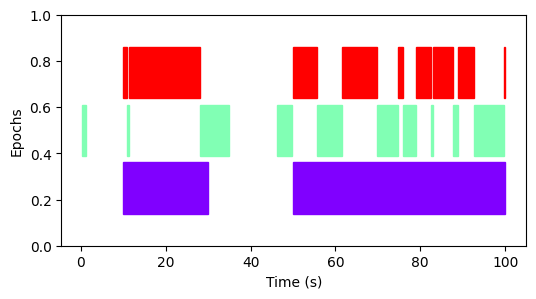

In [23]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.set_diff(ep_tmp)])

## Numpy & pynapple

<div class="render-all">

Pynapple objects behave similarly to numpy arrays. They can be sliced with the following syntax :

  `tsd[0:10] # First 10 elements`

Arithmetical operations are available as well :

  `tsd = tsd + 1`

Finally numpy functions works directly. Let's imagine `tsd3` is a movie with frame size (4,5).

**Question:** Can you compute the average frame along the time axis using `np.mean` and print the result?

</div>

In [24]:
print(np.mean(tsd3, 0))

[[-0.00266822 -0.00397756 -0.01121976  0.06423593  0.01602596]
 [ 0.01867997  0.02047959  0.02016273 -0.01673863  0.0523135 ]
 [ 0.05542095  0.04389564  0.0322951   0.01032191 -0.0577646 ]
 [-0.01326979  0.02900303 -0.06339853  0.0058261  -0.00706767]]


<div class="render-all">

**Question:** can you compute the average of `tsd2` for each timestamps and print it?
</div>

In [25]:
print(np.mean(tsd2, 1))

Time (s)
----------  ----------
0.0          0.377696
1.0          1.42197
2.0         -0.0635129
3.0         -0.320137
4.0          0.259065
5.0          0.646665
6.0          0.853505
...
93.0         0.587264
94.0         0.22059
95.0        -0.438074
96.0        -0.179929
97.0        -0.0448031
98.0        -0.403198
99.0         0.465943
dtype: float64, shape: (100,)


Notice how the output in the second case is still a pynapple object.
In most cases, applying a numpy function will return a pynapple object if the time index is preserved.

## Slicing pynapple objects 

Multiple methods exists to slice pynapple object. This parts reviews them.

`IntervalSet` also behaves like numpy array.

<div class="render-all">

**Question:** Can you extract the first and last epoch of `ep` in a new `IntervalSet`?
</div>

In [26]:
print(ep[[0,2]])

  index    start    end
      0       10     20
      1       90     95
shape: (2, 2), time unit: sec.


<div class="render-all">

Sometimes you want to get a data point as close as possible in time to another timestamps.

**Question:** Using the `get` method, can you get the data point from `tsd3` as close as possible to the time 50.1 seconds?

</div>

In [27]:
print(tsd3.get(50.1))

[[ 0.65283199  1.05694934  1.07163295 -0.26324274  0.81080558]
 [-0.45577273 -0.88707602 -0.22212471 -1.01553257  1.20002188]
 [ 1.11830669  1.38189136  0.7328413   1.09236266  0.20959905]
 [ 0.48171555  0.41060655 -0.44806232 -0.70541504 -1.1777033 ]]


## Metadata

<div class="render-all">

Metadata allow you to attach labels and additional information to your data objects. They are ubiquitous in neuroscience. They can be added to 3 pynapple objects :

- `TsGroup` : to label neurons in electrophysiology
- `IntervalSet` : to label intervals
- `TsdFrame` : to label neurons in calcium imaging


**Question:** Can you run the following command `tsgroup['planet'] = ['mars', 'venus', 'saturn']`
</div>

In [28]:
tsgroup['planet'] = ['mars', 'venus', 'saturn']

<div class="render-all">

**Question:** Can you print the result?
</div>

In [29]:
print(tsgroup)

  Index    rate  planet
-------  ------  --------
      0    0.03  mars
      1    1     venus
      2    1     saturn


<div class="render-all">

The object `ep` has 3 epochs labelled `['left', 'right', 'left']`. 

**Question:** Can you add them as a metadata column called `direction`?

</div>

In [30]:
ep['direction'] = ['left', 'right', 'left']
print(ep)

  index    start    end  direction
      0       10     20  left
      1       60     80  right
      2       90     95  left
shape: (3, 2), time unit: sec.


<div class="render-all">

The object `tsd2` has 3 columns. Each column correspond to the rgb colors `[(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]`. 

**Question:** Can you add them as metadata of `tsd2`?
</div>

In [31]:
tsd2['colors'] = [(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]
print(tsd2)

Time (s)    pineapple            banana                tomato
----------  -------------------  --------------------  --------------------
0.0         1.7775358314152239   0.05521785485541858   -0.6996644193849427
1.0         1.4050823563903854   1.9769386287913564    0.8838911162393533
2.0         -1.1659193134985324  1.0891694239299732    -0.11378870912719626
3.0         -0.4207511977189161  0.7999427368633322    -1.3396033224604036
4.0         -0.707111043135666   0.745992190578279     0.7383126456701766
5.0         0.8808969435391747   0.9500186889269977    0.10907971256624266
6.0         1.9493263363234383   0.24544411323646886   0.3657452197955453
...
93.0        1.0846186651513827   0.7850574395686843    -0.10788453569936557
94.0        0.10932489242361744  0.4195727599404553    0.1328723883300404
95.0        -1.1065660442740761  1.16389345314183      -1.371548792443763
96.0        -0.9844434147483447  -0.3618561113171103   0.8065126539753766
97.0        0.1127165067668288   0.16

<div class="render-all">

You can also add metadata at initialization as a dictionary using the keyword argument `metadata`: 
</div>

In [32]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3}, metadata={'planet':['mars','venus', 'saturn']})

print(tsgroup)

  Index     rate  planet
-------  -------  --------
      0  0.03917  mars
      1  0.05223  venus
      2  1.30582  saturn


<div class="render-all">

Metadata are accessible either as attributes (i.e. `tsgroup.planet`) or as dictionary-like keys (i.e. `ep['direction']`).

They can be used to slice objects. 

**Question:** Can you select only the elements of `tsgroup` with rate below 1Hz?
</div>

In [33]:
print(tsgroup[tsgroup.rate<1.0])

print(tsgroup[tsgroup['rate']<1.0])

print(tsgroup.getby_threshold("rate", 1, "<"))

  Index     rate  planet
-------  -------  --------
      0  0.03917  mars
      1  0.05223  venus
  Index     rate  planet
-------  -------  --------
      0  0.03917  mars
      1  0.05223  venus
  Index     rate  planet
-------  -------  --------
      0  0.03917  mars
      1  0.05223  venus


<div class="render-all">

**Question:** Can you select the intervals in `ep` labelled as `'left'`?
</div>

In [34]:
print(ep[ep.direction=='left'])

  index    start    end  direction
      0       10     20  left
      1       90     95  left
shape: (2, 2), time unit: sec.


### Special case of slicing : `TsdFrame`

In [35]:
tsdframe = nap.TsdFrame(t=np.arange(4), d=np.random.randn(4,3),
  columns = [12, 0, 1], metadata={'alpha':[2,1,0]})

print(tsdframe)

Time (s)    12                   0                    1
----------  -------------------  -------------------  --------------------
0.0         1.6625129727280394   -1.398468820586479   -0.23559844302847224
1.0         1.129542227226938    1.025609842386152    0.7062615500338065
2.0         -1.1026956323601753  0.8162065921715198   0.5783671851387376
3.0         2.519834584869436    -0.7241205287348654  -0.7350435874778735
Metadata
alpha       2                    1                    0
dtype: float64, shape: (4, 3)


<div class="render-all">

**Question:** What happen when you do `tsdframe[0]` vs `tsdframe[:,0]` vs `tsdframe[[12,1]]`
</div>

In [36]:
print(tsdframe[0])

[ 1.66251297 -1.39846882 -0.23559844]


In [37]:
print(tsdframe[:,0])

Time (s)
----------  --------
0            1.66251
1            1.12954
2           -1.1027
3            2.51983
dtype: float64, shape: (4,)


In [38]:
try:
    print(tsdframe[[12,1]])
except Exception as e:
    print(e)

index 12 is out of bounds for axis 0 with size 4


<div class="render-all">

**Question:** What happen when you do `tsdframe.loc[0]` and `tsdframe.loc[[0,1]]`
</div>

In [39]:
print(tsdframe.loc[0])

Time (s)
----------  ---------
0           -1.39847
1            1.02561
2            0.816207
3           -0.724121
dtype: float64, shape: (4,)


In [40]:
print(tsdframe.loc[[0,1]])

Time (s)    0                    1
----------  -------------------  --------------------
0.0         -1.398468820586479   -0.23559844302847224
1.0         1.025609842386152    0.7062615500338065
2.0         0.8162065921715198   0.5783671851387376
3.0         -0.7241205287348654  -0.7350435874778735
Metadata
alpha       1                    0
dtype: float64, shape: (4, 2)


<div class="render-all">

**Question:** What happen when you do `tsdframe[:,tsdframe.alpha==2]`

</div>

In [41]:
print(tsdframe[:,tsdframe.alpha==2])

Time (s)    12
----------  -------------------
0.0         1.6625129727280394
1.0         1.129542227226938
2.0         -1.1026956323601753
3.0         2.519834584869436
Metadata
alpha       2
dtype: float64, shape: (4, 1)


## Core functions of pynapple 

<div class="render-all">

This part focuses on the most important core functions of pynapple.

**Question:** Using the `count` function, can you count the number of events within 1 second bins for `tsgroup` over the `ep_signal` intervals?
</div>

In [42]:
count = tsgroup.count(1, ep_signal)
print(count)

Time (s)    0     1      2
----------  ----  -----  ------
10.5        0     1      1
11.5        0     0      0
12.5        0     0      0
13.5        0     0      2
14.5        0     0      1
15.5        0     0      3
16.5        0     0      2
...
93.5        0     0      0
94.5        0     0      0
95.5        0     0      0
96.5        0     0      0
97.5        0     0      0
98.5        0     0      0
99.5        0     0      0
Metadata
planet      mars  venus  saturn
dtype: int64, shape: (70, 3)


Pynapple works directly with matplotlib. Passing a time series object to `plt.plot` will display the figure with the correct time axis.

<div class="render-all">

**Question:** In two subplots, can you show the count and events over time?

</div>

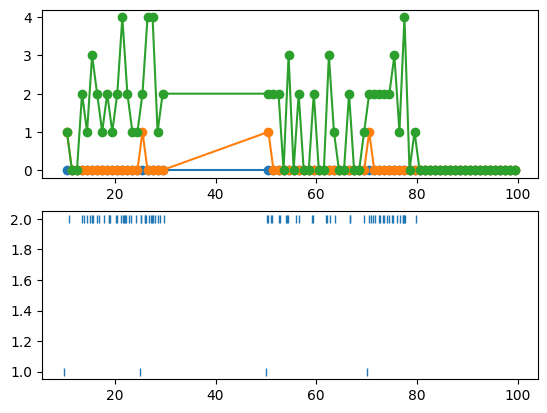

In [43]:
plt.figure()
ax = plt.subplot(211)
plt.plot(count, 'o-')
plt.subplot(212, sharex=ax)
plt.plot(tsgroup.restrict(ep_signal).to_tsd(), '|')

<div class="render-all">

From a set of timestamps, you want to assign them a set of values with the closest point in time of another time series.

**Question:** Using the function `value_from`, can you assign values to `ts2` from the `tsd1` time series and call the output `new_tsd`?

</div>

In [44]:
new_tsd = ts2.value_from(tsd1)

<div class="render-all">

**Question:** Can you plot together `tsd1`, `ts2` and `new_tsd`?

</div>

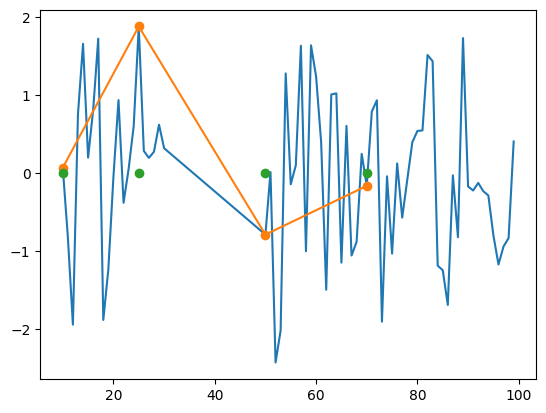

In [45]:
plt.figure()
plt.plot(tsd1)
plt.plot(new_tsd, 'o-')
plt.plot(ts2.fillna(0), 'o')

<div class="render-all">

One important aspect of data analysis is to bring data to the same size. Pynapple provides the `bin_average` function to downsample data.

**Question:** Can you downsample `tsd2` to one time point every 5 seconds?

</div>

In [46]:
new_tsd2 = tsd2.bin_average(5.0)

<div class="render-all">

**Question:** Can you plot the `tomato` column from `tsd2` as well as the downsampled version?

</div>

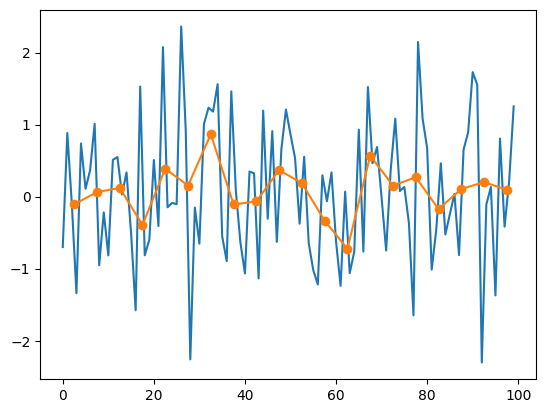

In [47]:
plt.figure()
plt.plot(tsd2['tomato'])
plt.plot(new_tsd2['tomato'], 'o-')

<div class="render-all">

For `tsd1`, you want to find all the epochs for which the value is above 0.0. Pynapple provides the function `threshold` to get 1 dimensional time series above or below a certain value.

**Question**: Can you print the epochs for which `tsd1` is above 0.0?
</div>

In [48]:
ep_above = tsd1.threshold(0.0).time_support

print(ep_above)

index    start    end
0        10.0     10.5
1        12.5     17.5
2        20.5     21.5
3        22.5     30.0
4        50.5     51.5
5        53.5     54.5
6        55.5     57.5
...      ...      ...
9        65.5     66.5
10       68.5     69.5
11       70.5     72.5
12       75.5     76.5
13       78.5     83.5
14       88.5     89.5
15       98.5     99.0
shape: (16, 2), time unit: sec.


<div class="render-all">

**Question**: can you plot `tsd1` as well as the epochs for which `tsd1` is above 0.0?
</div>

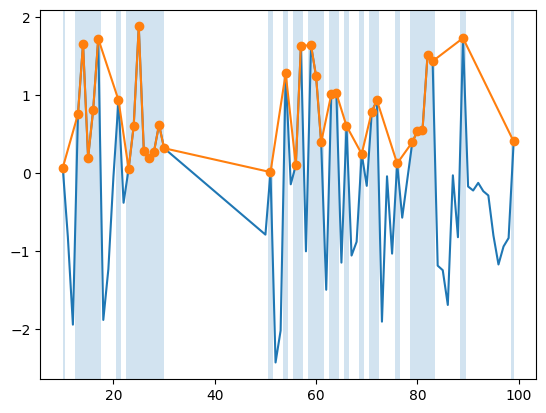

In [49]:
plt.figure()
plt.plot(tsd1)
plt.plot(tsd1.threshold(0.0), 'o-')
[plt.axvspan(s, e, alpha=0.2) for s,e in ep_above.values]

## First high level function : `compute_tuning_curves`

<div class="render-all">

Pynapple provides functions for standard analysis in systems neuroscience. The first function we will try is `compute_tuning_curves` that calculate the response of a cell to a particular feature. 

A good practice when using a function for the first time is to check the docstrings to learn how to pass the argument.

**Question**: can you examine the docstring of `nap.compute_tuning_curves`?

</div>

In [50]:
print(nap.compute_tuning_curves.__doc__)


    Computes n-dimensional tuning curves relative to n features.

    Parameters
    ----------
    data : TsGroup, TsdFrame, Ts, Tsd
        The data for which the tuning curves will be computed. This usually corresponds to the activity of the
        neurons, either as spike times (TsGroup or Ts) or continuous values (TsdFrame or Tsd).
    features : Tsd, TsdFrame
        The features (i.e. one column per feature). This usually corresponds to behavioral variables such as
        position, head direction, speed, etc.
    bins : sequence or int
        The bin specification:

        * A sequence of arrays describing the monotonically increasing bin
          edges along each dimension.
        * The number of bins for each dimension (nx, ny, ... =bins)
        * The number of bins for all dimensions (nx=ny=...=bins).
    range : sequence, optional
        A sequence of entries per feature, each an optional (lower, upper) tuple giving
        the outer bin edges to be used if the edge

<div class="render-all">

**Question**: Can you compute the response (i.e. firing rate) of the units in `tsgroup` as function of the feature `tsd1` using the function `nap.compute_tuning_curves`?

</div>

In [51]:
tc = nap.compute_tuning_curves(tsgroup, tsd1, bins=5, feature_names=["feat1"])
tc

<xarray.DataArray (unit: 3, feat1: 5)> Size: 120B
array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.0625    , 0.11111111, 0.        , 0.09090909],
       [1.16666667, 0.75      , 1.11111111, 1.25      , 1.        ]])
Coordinates:
  * unit     (unit) int64 24B 0 1 2
  * feat1    (feat1) float64 40B -1.994 -1.132 -0.2705 0.5914 1.453
Attributes:
    occupancy:  [ 6. 16. 18. 20. 11.]
    bin_edges:  [array([-2.42506932, -1.56322605, -0.70138277,  0.16046051,  ...
    fs:         1.0
    rates:      [       nan 0.05714286 1.07142857]

<div class="render-all">

The output is an [xarray](https://docs.xarray.dev/en/stable/) object. It is a wrapper of numpy array with extra attributes. It allows to give coordinates to each dimensions as well as attaching attributes. We can make the output look better by labelling the feature we used.

The coordinates can be accessed with the `coords` attribute. The feature position (i.e. center of the bin) can be accessed with the attribute.

**Question**: Can you print the underlying the units number, bin center and bin edges of the tuning curve xarray object?

</div>

In [52]:
print(tc.unit.values)
print(tc.feat1.values)
print(tc.occupancy)
print(tc.bin_edges)
print(tc.fs)

[0 1 2]
[-1.99414768 -1.13230441 -0.27046113  0.59138215  1.45322543]
[ 6. 16. 18. 20. 11.]
[array([-2.42506932, -1.56322605, -0.70138277,  0.16046051,  1.02230379,
        1.88414707])]
1.0


<div class="render-all">

**Question**: Can you plot the tuning curves for all units?

</div>

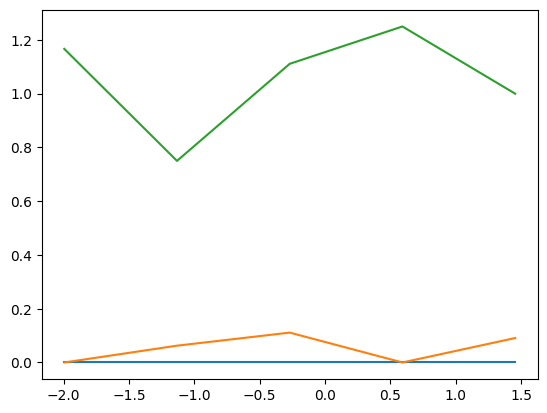

In [53]:
# tc.plot()
# tc.plot(row="unit")
# tc.plot(col="unit")
# tc[1].plot()
# plt.plot(tc[1].feat1, tc[1].values)
plt.plot(tc.feat1, tc.values.T)

## Verify Your Setup

<div class="render-all">

**Question:** Does the following data download work correctly? If not, please ask a TA.

</div>

In [54]:
import workshop_utils
path = workshop_utils.fetch_data("Mouse32-140822.nwb")
print(path)

/home/agent/workspace/rorse_ccn-software-feb-2026_main/data/Mouse32-140822.nwb
